### 標準偏差が持つルール、68–95–99.7則

ここでは標準偏差$\sigma$が持っている68–95–99.7則と呼ばれる性質の説明を行う。

68–95–99.7則は正規分布に従うグラフであるとき、平均$\pm\sigma$に含まれるデータは全体の68％を占め、平均$\pm2\sigma$に含まれるデータは全体の95％を占め、平均$\pm3\sigma$に含まれるデータは全体の99.7％を占めるという法則である。

ここでは68％の時について考えていく。

データ量の関係より今回はcsvファイルで説明を行う。同じワークスペースにdataフォルダを作り、そこにcsvファイルを置いて読み取る。今回は500人の生徒の数学のテストの結果を模したcsvファイルを作成した。

初めにcsvファイルの読み込みが出来ているかを確認する。

In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
#csvファイルの読み込みを行う。
df = pd.read_csv('data/suugaku.csv',
                 index_col='生徒番号')
#１0人分の数学のデータを使う
scores = np.array(df['数学'])[:10]

In [3]:
#それぞれのデータに名前を付ける
scores_df = pd.DataFrame({'点数':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='生徒'))
scores_df

,点数
生徒,
A,53
B,54
C,48
D,50
E,28
F,58
G,48
H,73
I,46


csvファイルが読み込めていることを確認できた。

次に68％の法則が成り立っているかどうかを確認する。

ここで68則を使うためにはデータが正規分布に従っている必要がある。正規分布に準じているかどうかはヒストグラムを見ることで判断が可能であるため、ヒストグラムを作成する。

In [4]:
# 500人分の数学の点数のarray
math_scores = np.array(df['数学'])
# Seriesに変換してdescribeを表示、ここで小数点2ケタにするためにprecisionを2に設定している。
pd.set_option('precision', 2)
pd.Series(math_scores).describe()

count    500.00
mean      49.16
std       14.33
min        2.00
25%       39.00
50%       49.00
75%       58.00
max       88.00
dtype: float64

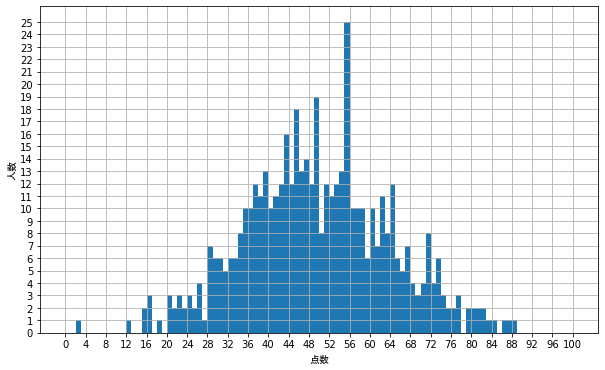

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(math_scores, bins=100, range=(0, 100))
ax.set_xlabel('点数', fontname="MS Gothic")
ax.set_ylabel('人数', fontname="MS Gothic")
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.grid()
plt.show()

グラフより、このデータはおおよそ正規分布に従っていることが分かる。

次に平均$\pm\sigma$に含まれるデータが全体の何％を占めているかを計算する。

全500個のデータ中、平均$\pm\sigma$に含まれるデータ数がいくつあるか計算し、その割合を求めれば良い。

In [6]:
df

,数学
生徒番号,
1,53
2,54
3,48
4,50
5,28
...,...
496,72
497,31
498,66


In [7]:
ave1 = df[(df['数学'] < 49.16 + 14.33) & (df['数学'] > 49.16 - 14.33)]
ave1

,数学
生徒番号,
1,53
2,54
3,48
4,50
6,58
...,...
492,37
494,37
495,49


In [8]:
346 / 500 * 100

69.19999999999999

よって平均$\pm\sigma$に含まれるデータは全体の69.2％を占めている。つまり68％ルールは成り立っているといえる。

正規分布に従うデータではこのルールによって、ある程度の正確性を持つ予測を立てる事が可能になっている。

またこの数値から母数データが正規分布に従っているかどうかを判断することも出来る。

標準偏差はデータを扱う上で非常に便利な性質を持っている事が分かった。